# An image Colour analyzer

In [27]:
#!pip install opencv-python scikit-learn numpy matplotlib

## Essentials

In [2]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

> We use `imread` method by OpenCV to read the image. And then, convert the colour format from BGR to RGB using `cvtColor`.

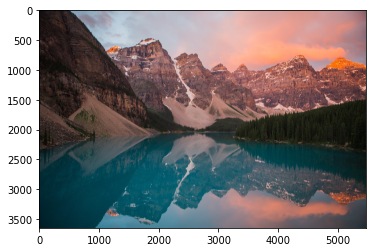

In [3]:
imgSource = 'data/Images/garrett-parker-DlkF4-dbCOU-unsplash.jpg'
image = cv2.imread(imgSource)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Converting RBG to Hex

It helps us visualize the results

In [30]:
def Rgb2Hex(rgbColour):
  hexColour = "#"
  for i in rgbColour:
    i = int(i)
    hexColour += ("{:02x}".format(i))
  return hexColour

### Preparign the Image

We resize and reshape the image here. Resizing is optional but reshaping helps colour analysis model work well.

In [31]:
def imagePrep(rawImg):
  imgModified = cv2.resize(rawImg,(900,600),interpolation = cv2.INTER_AREA)  
  imgModified = imgModified.reshape(imgModified.shape[0]*imgModified.shape[1],3)
  return imgModified

### Colour analysis

- First use k-means to cluster top colours, where we tell it the number of clusters we want. Then predict the colours most prominent

- Second, call the counter function to contain elements as dictionary keys, and volumes as dict values.

- then pass the colours to `Rgb2Hex` to get the hex values.

Last, we visualize the result in the form of a pie chart, and then save it with teh `savefig` method.

In [62]:
def colourAnalysis(img):
  cif = KMeans(n_clusters=5) ## Change if you want to
  labelColour = cif.fit_predict(img)
  centerColour = cif.cluster_centers_

  count = Counter(labelColour)
  orderColour = [centerColour[i] for i in count.keys()]
  hexColours = [Rgb2Hex(orderColour[i]) for i in count.keys()]

  plt.figure(figsize=(12,8))
  plt.pie(count.values(), labels= hexColours, colors=hexColours, autopct='%.1f%%', wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
  plt.title(f'Char for {imgSource[12:-4]}')
  plt.savefig(f"ColourAnalysis-{imgSource[12:-4]}")

## Testing

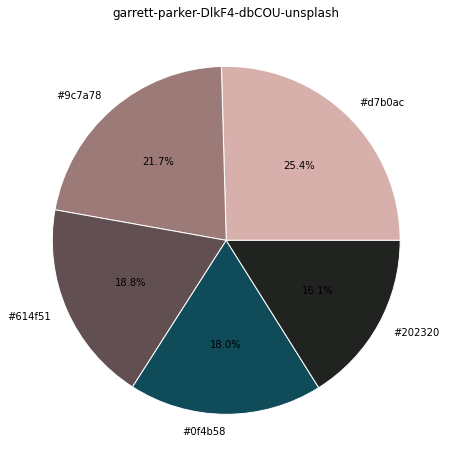

In [74]:
mod_img = imagePrep(image)
colourAnalysis(mod_img)